In [4]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import numpy as np
import json
import pandas as pd
from scipy import stats
import os

In [5]:
experiments = [
            {'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby', 'arity': 2},
            #{'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder', 'arity': 2},
            #{'id': '3', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue', 'arity': 2},
            #{'id': '4', 'source':'cora', 'target':'imdb', 'predicate':'samevenue', 'to_predicate':'workedunder', 'arity': 2},
            ##{'id': '5', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue', 'arity': 2},
            ##{'id': '6', 'source':'cora', 'target':'uwcse', 'predicate':'samevenue', 'to_predicate':'advisedby', 'arity': 2},
            {'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2},
            {'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2},
            {'id': '9', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector', 'arity': 2},
            {'id': '10', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport', 'arity': 2}
]

In [6]:
def load_data(experiments, metric, directory):
    data = {}
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        
        file_path = os.getcwd() + directory + experiment_title + '/' + experiment_title + '_fasttext_{}.json'.format(metric)
 
        #if(os.path.isfile(file_path)):
        with open(file_path, 'r') as fp:
            results = json.load(fp)

            data[experiment_title] = results
    return data

# Transfer Learning

In [26]:
data_softcosine = load_data(experiments, 'softcosine', '/OLD-EXPERIMENTS/transfer-experiments/')
data_euclidean = load_data(experiments, 'euclidean', '/OLD-EXPERIMENTS/transfer-experiments/')
data_wmd = load_data(experiments, 'wmd', '/OLD-EXPERIMENTS/transfer-experiments/')
#data_rwmd = load_data(experiments, 'relax-wmd', '/OLD-EXPERIMENTS/transfer-experiments/')

# Most similarity order
data_softcosine_most = load_data(experiments, 'softcosine','/transfer-experiments/')
data_euclidean_most = load_data(experiments, 'euclidean','/transfer-experiments/')
data_wmd_most = load_data(experiments, 'wmd','/transfer-experiments/')
#data_rwmd_most = load_data(experiments, 'relax-wmd','/transfer-experiments/')


for metric in ['AUC ROC', 'AUC PR', 'CLL', 'Learning time']: #, 'Recall', 'F1', 'Precision', 'Learning and Revision time', 'Inference time']:
    display(Markdown('# Results for ' + metric))
    
    for j in range(len(experiments)):
        table = []
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_euclidean:
            mapping_time = ''

            transfer_softcosine = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_softcosine[str(dataset)]])
            #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
            transfer_euclidean = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_euclidean[str(dataset)]])
            transfer_wmd = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_wmd[str(dataset)]])
            #transfer_relax_wmd = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd[str(dataset)]])

            transfer_softcosine_most = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_softcosine_most[str(dataset)]])
            #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
            transfer_euclidean_most = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_euclidean_most[str(dataset)]])
            transfer_wmd_most = np.array([(np.array([item['transfer'][metric] for item in sublist])).mean() for sublist in data_wmd_most[str(dataset)]])
            #transfer_relax_wmd_sim = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_sim[str(dataset)]])
            
            #treeboostler = np.array([(np.array([item['transfer'.format(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
            #treeboostler_no_revision = np.array([(np.array([item['transfer_{}'.format(amount)]['parameter'][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
            #print(treeboostler)
            #rdnb = np.array([(np.array([item['amount_{}'.format(amount)][metric] for item in sublist])).mean() for sublist in rdn_data[str(dataset)]])

            table.append([dataset,
            #'%.3f +/- %.3f' % (treeboostler_no_revision.mean(), 2* treeboostler_no_revision.std()),
            '%.3f +/- %.3f' % (transfer_softcosine.mean(), 2 * transfer_softcosine.std()),
            #'%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
            '%.3f +/- %.3f' % (transfer_euclidean.mean(), 2 * transfer_euclidean.std()),
            '%.3f +/- %.3f' % (transfer_wmd.mean(), 2 * transfer_wmd.std()),
            #'%.3f +/- %.3f' % (transfer_relax_wmd.mean(), 2 * transfer_relax_wmd.std())])
                         ])
            
            
            table.append([dataset + '*',
            '%.3f +/- %.3f' % (transfer_softcosine_most.mean(), 2 * transfer_softcosine_most.std()),
            #'%.3f +/- %.3f' % (transfer_cosine.mean(), 2 * transfer_cosine.std()),
            '%.3f +/- %.3f' % (transfer_euclidean_most.mean(), 2 * transfer_euclidean_most.std()),
            '%.3f +/- %.3f' % (transfer_wmd_most.mean(), 2 * transfer_wmd_most.std()),
            #'%.3f +/- %.3f' % (transfer_relax_wmd_sim.mean(), 2 * transfer_relax_wmd_sim.std())])
                         ])
                            
        #display(pd.DataFrame(table, columns=['Experiment', 'RDN-B'])) #, 'Transfer Learning with Revision Theory - Relax WMD'])) #, 'Learning from scratch (RDN-B)']))
        display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning with Revision Theory - SoftCosine', 'Transfer Learning with Revision Theory - Euclidean', 'Transfer Learning with Revision Theory - WMD'])) #, 'Learning from scratch (RDN-B)']))
        #display(pd.DataFrame(table, columns=['Experiment', 'Transfer Learning', 'Transfer Learning with Revision Theory']))

# Results for AUC ROC

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,1_imdb_uwcse,0.936 +/- 0.007,0.936 +/- 0.006,0.936 +/- 0.007
1,1_imdb_uwcse*,0.937 +/- 0.005,0.937 +/- 0.008,0.935 +/- 0.006


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,7_yeast_twitter,0.994 +/- 0.001,0.994 +/- 0.000,0.994 +/- 0.000
1,7_yeast_twitter*,0.995 +/- 0.001,0.994 +/- 0.001,0.995 +/- 0.001


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,8_twitter_yeast,0.920 +/- 0.096,0.894 +/- 0.150,0.953 +/- 0.027
1,8_twitter_yeast*,0.972 +/- 0.000,0.973 +/- 0.000,0.973 +/- 0.000


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,9_nell_sports_nell_finances,0.748 +/- 0.039,0.751 +/- 0.083,0.694 +/- 0.009
1,9_nell_sports_nell_finances*,0.709 +/- 0.028,0.631 +/- 0.058,0.955 +/- 0.012


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,10_nell_finances_nell_sports,0.991 +/- 0.006,0.993 +/- 0.003,0.994 +/- 0.001
1,10_nell_finances_nell_sports*,0.963 +/- 0.081,0.992 +/- 0.001,0.993 +/- 0.003


# Results for AUC PR

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,1_imdb_uwcse,0.284 +/- 0.045,0.275 +/- 0.035,0.274 +/- 0.045
1,1_imdb_uwcse*,0.289 +/- 0.028,0.300 +/- 0.058,0.271 +/- 0.036


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,7_yeast_twitter,0.382 +/- 0.096,0.389 +/- 0.028,0.374 +/- 0.034
1,7_yeast_twitter*,0.452 +/- 0.042,0.402 +/- 0.041,0.438 +/- 0.067


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,8_twitter_yeast,0.169 +/- 0.266,0.325 +/- 0.072,0.282 +/- 0.033
1,8_twitter_yeast*,0.344 +/- 0.000,0.385 +/- 0.000,0.311 +/- 0.000


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,9_nell_sports_nell_finances,0.077 +/- 0.016,0.088 +/- 0.027,0.076 +/- 0.004
1,9_nell_sports_nell_finances*,0.069 +/- 0.007,0.059 +/- 0.015,0.067 +/- 0.032


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,10_nell_finances_nell_sports,0.244 +/- 0.101,0.288 +/- 0.040,0.299 +/- 0.035
1,10_nell_finances_nell_sports*,0.242 +/- 0.053,0.302 +/- 0.065,0.286 +/- 0.051


# Results for CLL

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,1_imdb_uwcse,-0.255 +/- 0.023,-0.254 +/- 0.007,-0.247 +/- 0.014
1,1_imdb_uwcse*,-0.260 +/- 0.007,-0.250 +/- 0.016,-0.252 +/- 0.008


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,7_yeast_twitter,-0.127 +/- 0.056,-0.107 +/- 0.008,-0.107 +/- 0.006
1,7_yeast_twitter*,-0.088 +/- 0.001,-0.099 +/- 0.003,-0.098 +/- 0.006


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,8_twitter_yeast,-0.280 +/- 0.102,-0.282 +/- 0.115,-0.240 +/- 0.012
1,8_twitter_yeast*,-0.217 +/- 0.000,-0.228 +/- 0.000,-0.228 +/- 0.000


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,9_nell_sports_nell_finances,-0.321 +/- 0.011,-0.320 +/- 0.016,-0.330 +/- 0.008
1,9_nell_sports_nell_finances*,-0.317 +/- 0.012,-0.343 +/- 0.005,-0.213 +/- 0.006


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,10_nell_finances_nell_sports,-0.166 +/- 0.145,-0.097 +/- 0.035,-0.085 +/- 0.002
1,10_nell_finances_nell_sports*,-0.136 +/- 0.068,-0.141 +/- 0.006,-0.112 +/- 0.037


# Results for Learning time

,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,1_imdb_uwcse,5.944 +/- 0.446,6.440 +/- 1.441,5.896 +/- 0.551
1,1_imdb_uwcse*,10.521 +/- 0.934,12.640 +/- 1.781,11.802 +/- 1.927


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,7_yeast_twitter,23.388 +/- 41.322,26.098 +/- 49.435,24.552 +/- 43.776
1,7_yeast_twitter*,104.956 +/- 33.950,55.787 +/- 2.302,72.819 +/- 25.405


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,8_twitter_yeast,20.395 +/- 31.988,13.056 +/- 24.364,19.640 +/- 8.262
1,8_twitter_yeast*,33.182 +/- 0.000,34.329 +/- 0.000,31.009 +/- 0.000


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,9_nell_sports_nell_finances,174.724 +/- 84.579,158.171 +/- 51.731,147.918 +/- 27.345
1,9_nell_sports_nell_finances*,78.676 +/- 25.173,60.963 +/- 12.602,78.348 +/- 7.462


,Experiment,Transfer Learning with Revision Theory - SoftCosine,Transfer Learning with Revision Theory - Euclidean,Transfer Learning with Revision Theory - WMD
0,10_nell_finances_nell_sports,294.552 +/- 547.910,341.999 +/- 176.276,394.017 +/- 83.640
1,10_nell_finances_nell_sports*,303.339 +/- 124.074,185.254 +/- 17.145,299.826 +/- 112.086


# Curves Experiment

# Results for AUC ROC

# 1_imdb_uwcse

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


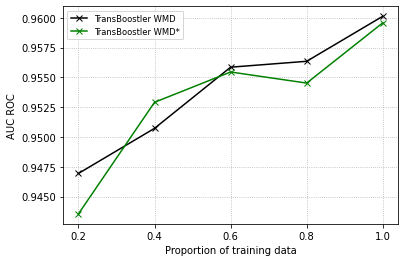

# 7_yeast_twitter

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


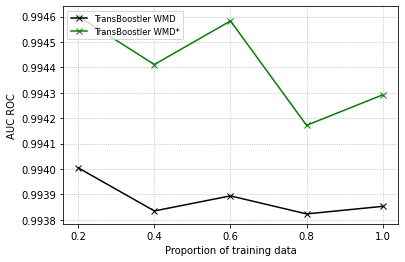

# 8_twitter_yeast

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


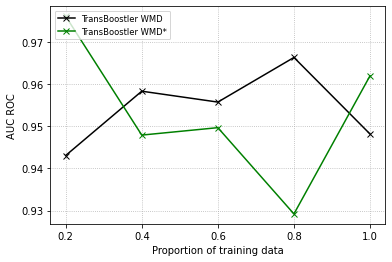

# 9_nell_sports_nell_finances

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


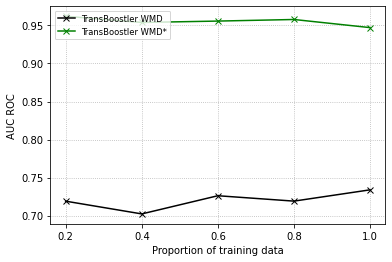

# 10_nell_finances_nell_sports

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


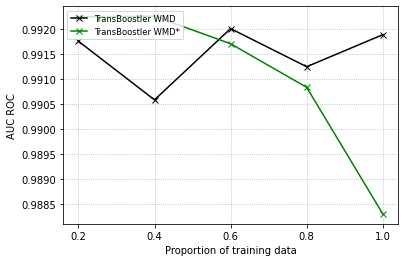

# Results for AUC PR

# 1_imdb_uwcse

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


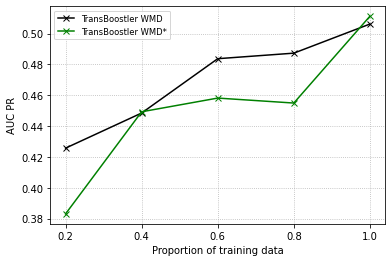

# 7_yeast_twitter

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


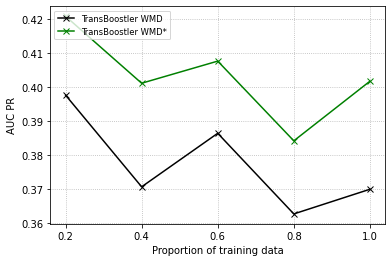

# 8_twitter_yeast

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


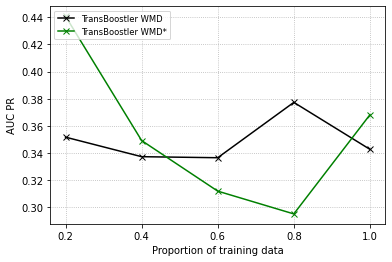

# 9_nell_sports_nell_finances

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


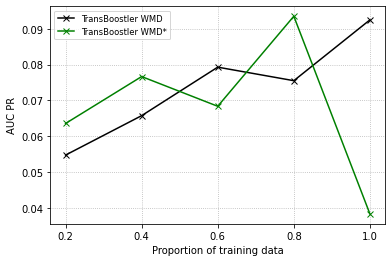

# 10_nell_finances_nell_sports

<ipython-input-11-e49fade75ab6>:74: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
<ipython-input-11-e49fade75ab6>:82: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "x-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')


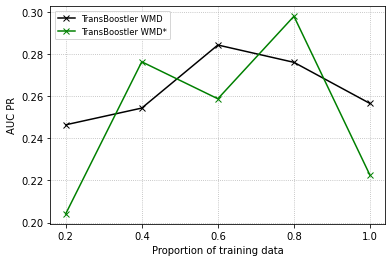

In [11]:
data_softcosine = load_data(experiments, 'softcosine', '/OLD-EXPERIMENTS/curves-experiments/')
data_euclidean = load_data(experiments, 'euclidean', '/OLD-EXPERIMENTS/curves-experiments/')
data_wmd = load_data(experiments, 'wmd', '/OLD-EXPERIMENTS/curves-experiments/')
#data_rwmd = load_data(experiments, 'relax-wmd', '/OLD-EXPERIMENTS/transfer-experiments/')

# Most similarity order
data_softcosine_most = load_data(experiments, 'softcosine','/curves-experiments/')
data_euclidean_most = load_data(experiments, 'euclidean','/curves-experiments/')
data_wmd_most = load_data(experiments, 'wmd','/curves-experiments/')
#data_rwmd_most = load_data(experiments, 'relax-wmd','/transfer-experiments/')

for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_euclidean:
            display(Markdown('# ' + dataset))
            softcosine = []
            cosine = []
            euclidean = []
            wmd = []
            relax_wmd = []

            softcosine_most = []
            cosine = []
            euclidean_most = []
            wmd_most = []
            relax_wmd = []
            
            tree = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                
                #treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                #transfer_softcosine = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine[str(dataset)]])
                #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                #transfer_euclidean = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean[str(dataset)]])
                transfer_wmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd[str(dataset)]])
                #transfer_rwmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd[str(dataset)]])
                #rdnb = np.array([(np.array([item['amount_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                
                #treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                #transfer_softcosine_most = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_most[str(dataset)]])
                #transfer_cosine = np.array(data[dataset]['cosine'][str(amount)][metric])
                #transfer_euclidean_most = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_most[str(dataset)]])
                transfer_wmd_most = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_most[str(dataset)]])
                #transfer_rwmd = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd[str(dataset)]])
                #rdnb = np.array([(np.array([item['amount_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                
                #tree.append(treeboostler.mean())
                #softcosine.append(transfer_softcosine.mean())
                #cosine.append(transfer_cosine.mean())
                #euclidean.append(transfer_euclidean.mean())
                wmd.append(transfer_wmd.mean())
                #relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_b_p.append(rdnb.mean())

                #tree.append(treeboostler.mean())
                #softcosine_most.append(transfer_softcosine_most.mean())
                #cosine.append(transfer_cosine.mean())
                #euclidean_most.append(transfer_euclidean_most.mean())
                wmd_most.append(transfer_wmd_most.mean())
                #relax_wmd.append(transfer_relax_wmd.mean())
                #rdn_b_p.append(rdnb.mean())

            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            fig, ax = plt.subplots()
            #ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
            #ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            #ax.plot(t, euclidean, 's-', linestyle='--', color='k', label='TransBoostler Euclidean')
            #ax.plot(t, softcosine, 's-', linestyle='--', color='k', label='TransBoostler SoftCosine')
            ax.plot(t, wmd, 'x-', linestyle='-', color='k', label='TransBoostler WMD')
            #ax.plot(t, relax_wmd, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD')
            #ax.plot(t, rdn_b_p, '8-', linestyle='-', color='k', label='RDN-B')

            #ax.plot(t, tree, 'd-', linestyle='dotted', color='k', label='TreeBoostler')
            #ax.plot(t, cosine, 'D-', linestyle='-.', color='g', label='TransBoostler Cosine')
            #ax.plot(t, euclidean_most, 's-', linestyle='--', color='k', label='TransBoostler Euclidean*')
            #ax.plot(t, softcosine_most, 's-', linestyle='--', color='k', label='TransBoostler SoftCosine*')
            ax.plot(t, wmd_most, 'x-', linestyle='-', color='g', label='TransBoostler WMD*')
            #ax.plot(t, relax_wmd_stop, 'x-', linestyle='-', color='k', label='TransBoostler Relax-WMD*')
            #ax.plot(t, rdn_b_p, '8-', linestyle='-', color='k', label='RDN-B')


            ax.set(xlabel='Proportion of training data', ylabel=metric)
            ax.grid(linestyle = ':')
            ax.legend(loc='upper left', fontsize='small', frameon=True)
            plt.xticks(t,t)
            plt.show()
            
            if not os.path.exists('learning_curves'):
                os.makedirs('learning_curves')
            fig.savefig("learning_curves/mappings_{}_{}_wmd.pdf".format(dataset, '_'.join(metric.split())), bbox_inches='tight')